# HW2 

I have changed the Attrition column in Excel to attritiona with if function for yes=1, No=0 and moved the column to the left
Varaibles dropped:

- MonthlyRate contains both Hourly and Dayly Rates, thats why I dropped them, and kept only monthlyrate
- dropping the StandardHours, as information is the same for everyone,thus the variance is 0
- dropping the EmployeeCount, as information is the same for everyone,thus the variance is 0
- dropping the Over18, as information is the same for everyone,thus the variance is 0

In [49]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split

In [50]:
data = pd.read_csv("WA.csv")

In [51]:
data.describe()

,Attritiona,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.161224,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,0.367863,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,0.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,0.000000,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,0.000000,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1.000000,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [52]:
data.head()

,Attritiona,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# dropping the StandardHours, as information is the same for everyone,thus the variance is 0
data = data.drop(["StandardHours"],axis=1)


In [55]:
# dropping the EmployeeCount, as information is the same for everyone,thus the variance is 0
data = data.drop(["EmployeeCount"],axis=1)


In [56]:
#dropping the HourlyRate and DailyRate, as we have also information about MonthlyRate.
data = data.drop(["HourlyRate"],axis=1)
data = data.drop(["DailyRate"],axis=1)

In [57]:
#dropping the Over18, as information is the same for everyone,thus the variance is 0
data = data.drop(["Over18"],axis=1)

In [58]:
#categorising the Business Travel into variables
#get integers
data["BusinessTravel"] = data["BusinessTravel"].astype("category").cat.reorder_categories(["Non-Travel","Travel_Rarely","Travel_Frequently"]).cat.codes
data["BusinessTravel"] = data["BusinessTravel"].where(data["BusinessTravel"]==0,1)

In [59]:
#categorising Marital Status into variables
data["MaritalStatus"] = data["MaritalStatus"].astype("category").cat.reorder_categories(["Single","Married","Divorced"]).cat.codes
data["MaritalStatus"] = data["MaritalStatus"].where(data["MaritalStatus"]==1,0)

In [60]:
data.head()

,Attritiona,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,Sales,1,2,Life Sciences,1,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,0,49,1,Research & Development,8,1,Life Sciences,2,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,1,37,1,Research & Development,2,2,Other,4,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,0,33,1,Research & Development,3,4,Life Sciences,5,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,0,27,1,Research & Development,2,1,Medical,7,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [61]:
#categorising Gender into variables
data["Gender"] = data["Gender"].astype("category").cat.reorder_categories(["Male","Female"]).cat.codes


In [62]:
data.head()

,Attritiona,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,Sales,1,2,Life Sciences,1,2,1,...,3,1,0,8,0,1,6,4,0,5
1,0,49,1,Research & Development,8,1,Life Sciences,2,3,0,...,4,4,1,10,3,3,10,7,1,7
2,1,37,1,Research & Development,2,2,Other,4,4,0,...,3,2,0,7,3,3,0,0,0,0
3,0,33,1,Research & Development,3,4,Life Sciences,5,4,1,...,3,3,0,8,3,3,8,7,3,0
4,0,27,1,Research & Development,2,1,Medical,7,1,0,...,3,4,1,6,3,3,2,2,2,2


In [63]:
#categorising the Business Travel and Marital Status variables
data["OverTime"] = data["OverTime"].astype("category").cat.reorder_categories(["Yes","No"]).cat.codes

In [64]:
data.dtypes

Attritiona                   int64
Age                          int64
BusinessTravel                int8
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                        int8
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus                 int8
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                      int8
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromot

In [65]:
department = pd.get_dummies(data["Department"])
department.head()

,Human Resources,Research & Development,Sales
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [66]:
#As we have several Human Resourse columns we have to delete it from department
ddepartment = department.drop(["Human Resources"],axis=1)
ddepartment.head()

,Research & Development,Sales
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [67]:
data = data.drop(["Department"],axis=1)
data.head()

,Attritiona,Age,BusinessTravel,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,1,2,Life Sciences,1,2,1,3,...,3,1,0,8,0,1,6,4,0,5
1,0,49,1,8,1,Life Sciences,2,3,0,2,...,4,4,1,10,3,3,10,7,1,7
2,1,37,1,2,2,Other,4,4,0,2,...,3,2,0,7,3,3,0,0,0,0
3,0,33,1,3,4,Life Sciences,5,4,1,3,...,3,3,0,8,3,3,8,7,3,0
4,0,27,1,2,1,Medical,7,1,0,3,...,3,4,1,6,3,3,2,2,2,2


In [68]:
educationfield = pd.get_dummies(data["EducationField"])
educationfield.head()

,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,1,0,0,0,0
4,0,0,0,1,0,0


In [69]:
#As we have several Human Resourse columns we have to delete it from department
deducationfield = educationfield.drop(["Human Resources"],axis=1)
deducationfield.head()

,Life Sciences,Marketing,Medical,Other,Technical Degree
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,0,1,0
3,1,0,0,0,0
4,0,0,1,0,0


In [70]:
data = data.drop(["EducationField"],axis=1)
data.head()

,Attritiona,Age,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,1,2,1,2,1,3,2,...,3,1,0,8,0,1,6,4,0,5
1,0,49,1,8,1,2,3,0,2,2,...,4,4,1,10,3,3,10,7,1,7
2,1,37,1,2,2,4,4,0,2,1,...,3,2,0,7,3,3,0,0,0,0
3,0,33,1,3,4,5,4,1,3,1,...,3,3,0,8,3,3,8,7,3,0
4,0,27,1,2,1,7,1,0,3,1,...,3,4,1,6,3,3,2,2,2,2


In [71]:
jobrole = pd.get_dummies(data["JobRole"])
jobrole.head()

,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0


In [72]:
Jobrole = jobrole.drop(["Manager"],axis=1)
Jobrole.head()

,Healthcare Representative,Human Resources,Laboratory Technician,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0


In [73]:
data = data.drop(["JobRole"],axis=1)
data.head()

,Attritiona,Age,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,1,2,1,2,1,3,2,...,3,1,0,8,0,1,6,4,0,5
1,0,49,1,8,1,2,3,0,2,2,...,4,4,1,10,3,3,10,7,1,7
2,1,37,1,2,2,4,4,0,2,1,...,3,2,0,7,3,3,0,0,0,0
3,0,33,1,3,4,5,4,1,3,1,...,3,3,0,8,3,3,8,7,3,0
4,0,27,1,2,1,7,1,0,3,1,...,3,4,1,6,3,3,2,2,2,2


In [74]:
data.isnull().any()

Attritiona                  False
Age                         False
BusinessTravel              False
DistanceFromHome            False
Education                   False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
JobInvolvement              False
JobLevel                    False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany              False
YearsInCurrentRole          False
YearsSinceLastPromotion     False
YearsWithCurrManager        False
dtype: bool

In [75]:
data.corr()

,Attritiona,Age,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attritiona,1.000000,-0.159205,0.074457,0.077924,-0.031373,-0.010577,-0.103369,-0.029453,-0.130016,-0.169105,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
Age,-0.159205,1.000000,0.011215,-0.001686,0.208034,-0.010145,0.010146,0.036311,0.029820,0.509604,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
BusinessTravel,0.074457,0.011215,1.000000,-0.023605,-0.004524,-0.022272,-0.003568,0.050461,0.045779,0.007295,...,-0.018310,-0.021132,-0.028807,0.029742,0.020746,-0.005780,-0.007623,-0.011549,-0.020815,-0.016716
DistanceFromHome,0.077924,-0.001686,-0.023605,1.000000,0.021042,0.032916,-0.016075,0.001851,0.008783,0.005303,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,-0.031373,0.208034,-0.004524,0.021042,1.000000,0.042070,-0.027128,0.016547,0.042438,0.101589,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeNumber,-0.010577,-0.010145,-0.022272,0.032916,0.042070,1.000000,0.017621,-0.022556,-0.006888,-0.018519,...,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,-0.103369,0.010146,-0.003568,-0.016075,-0.027128,0.017621,1.000000,-0.000508,-0.008278,0.001212,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.029453,0.036311,0.050461,0.001851,0.016547,-0.022556,-0.000508,1.000000,-0.017960,0.039403,...,0.013859,-0.022868,-0.012716,0.046881,0.038787,0.002753,0.029747,0.041483,0.026985,0.030599
JobInvolvement,-0.130016,0.029820,0.045779,0.008783,0.042438,-0.006888,-0.008278,-0.017960,1.000000,-0.012630,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,-0.169105,0.509604,0.007295,0.005303,0.101589,-0.018519,0.001212,0.039403,-0.012630,1.000000,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


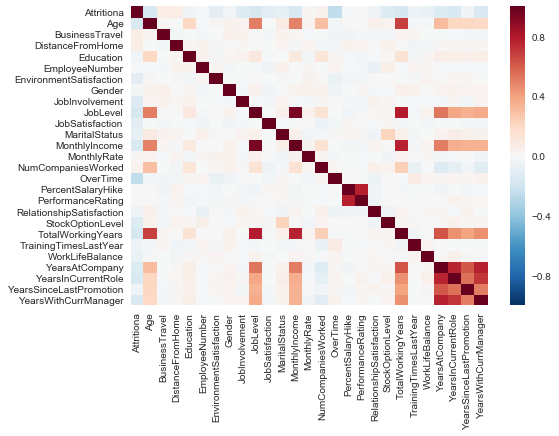

In [76]:
sns.heatmap(data.corr())
plt.show()

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
Attritiona                  1470 non-null int64
Age                         1470 non-null int64
BusinessTravel              1470 non-null int8
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null int8
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null int8
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked          1470 non-null int64
OverTime                    1470 non-null int8
PercentSalaryHike           1470 non-null int64
PerformanceRating           1470 non-null int64
RelationshipSatisfaction    1470 

In [78]:
data = data.join(ddepartment)
data.head()

,Attritiona,Age,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Research & Development,Sales
0,1,41,1,1,2,1,2,1,3,2,...,0,8,0,1,6,4,0,5,0,1
1,0,49,1,8,1,2,3,0,2,2,...,1,10,3,3,10,7,1,7,1,0
2,1,37,1,2,2,4,4,0,2,1,...,0,7,3,3,0,0,0,0,1,0
3,0,33,1,3,4,5,4,1,3,1,...,0,8,3,3,8,7,3,0,1,0
4,0,27,1,2,1,7,1,0,3,1,...,1,6,3,3,2,2,2,2,1,0


In [79]:
data = data.join(deducationfield)
data.head()

,Attritiona,Age,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Research & Development,Sales,Life Sciences,Marketing,Medical,Other,Technical Degree
0,1,41,1,1,2,1,2,1,3,2,...,4,0,5,0,1,1,0,0,0,0
1,0,49,1,8,1,2,3,0,2,2,...,7,1,7,1,0,1,0,0,0,0
2,1,37,1,2,2,4,4,0,2,1,...,0,0,0,1,0,0,0,0,1,0
3,0,33,1,3,4,5,4,1,3,1,...,7,3,0,1,0,1,0,0,0,0
4,0,27,1,2,1,7,1,0,3,1,...,2,2,2,1,0,0,0,1,0,0


In [80]:
data = data.join(Jobrole)
data.head()

,Attritiona,Age,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,Other,Technical Degree,Healthcare Representative,Human Resources,Laboratory Technician,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
0,1,41,1,1,2,1,2,1,3,2,...,0,0,0,0,0,0,0,0,1,0
1,0,49,1,8,1,2,3,0,2,2,...,0,0,0,0,0,0,0,1,0,0
2,1,37,1,2,2,4,4,0,2,1,...,1,0,0,0,1,0,0,0,0,0
3,0,33,1,3,4,5,4,1,3,1,...,0,0,0,0,0,0,0,1,0,0
4,0,27,1,2,1,7,1,0,3,1,...,0,0,0,0,1,0,0,0,0,0


In [81]:
data["Attritiona"].value_counts()/len(data)*100

0    83.877551
1    16.122449
Name: Attritiona, dtype: float64

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
model = DecisionTreeClassifier(random_state=47)

In [84]:
inputs = data.iloc[:,1:]
output = data["Attritiona"]

In [85]:
model.fit(inputs,output)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=47, splitter='best')

In [86]:
model.score(inputs,output)*100

100.0

In [87]:
train, test = train_test_split(data,test_size=0.3) 

In [88]:
len(test)

441

In [89]:
train, test = train_test_split(data,train_size=0.7)

In [98]:
len(train)

1029

In [99]:
model_x = DecisionTreeClassifier(max_depth=7, random_state=50)

In [100]:
inputs_train,inputs_test,output_train,output_test = train_test_split(inputs,output,train_size=0.7)

In [101]:
model_x.fit(inputs_train,output_train)
model_x.score(inputs_test,output_test)*100

83.446712018140587

In [102]:
from sklearn.tree import export_graphviz

In [103]:
export_graphviz(model_x,"treeik.dot")

In [104]:
df = pd.DataFrame(index=list(data)[1:],data=model.feature_importances_)
df

,0
Age,0.053899
BusinessTravel,0.000000
DistanceFromHome,0.042076
Education,0.015770
EmployeeNumber,0.052432
EnvironmentSatisfaction,0.012157
Gender,0.015528
JobInvolvement,0.024961
JobLevel,0.006526
JobSatisfaction,0.037065


In [105]:
df.sort_values(by=0, ascending = False)

,0
MonthlyIncome,0.134839
OverTime,0.060574
Age,0.053899
EmployeeNumber,0.052432
YearsInCurrentRole,0.044613
MonthlyRate,0.044372
TotalWorkingYears,0.043119
YearsAtCompany,0.042921
StockOptionLevel,0.042710
DistanceFromHome,0.042076


In [109]:
model_x.predict([0, 12,3,0,12,0,0,0,1,3,0,0,31,0,0,0,7,0,0,9,0,0,0,7,6,14,0,23,0,0,0,0,0,1,0,3,3,1,0,1,2])

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([1], dtype=int64)